In [229]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [230]:
mp = 1.672622e-24 # mass of hydrogren atom, in grams
kb = 1.380658e-16 # boltzmann constant in ergs/K

In [231]:
f = h5py.File('200_512_f32.h5', 'r')
head = f.attrs

In [232]:
head.keys()

<KeysViewHDF5 ['density_unit', 'dims', 'dt', 'dx', 'energy_unit', 'gamma', 'length_unit', 'mass_unit', 'n_fields', 'n_step', 't', 'time_unit', 'velocity_unit']>

In [233]:
f.keys()

<KeysViewHDF5 ['Energy', 'GasEnergy', 'density', 'momentum_x', 'momentum_y', 'momentum_z']>

In [234]:
gamma = head['gamma'] # ratio of specific heats
t  = head['t'] # time of this snapshot, in kyr
nx = head['dims'][0] # number of cells in the x direction
ny = head['dims'][1] # number of cells in the y direction
nz = head['dims'][2] # number of cells in the z direction
dx = head['dx'][0] # width of cell in x direction
dy = head['dx'][1] # width of cell in y direction
dz = head['dx'][2] # width of cell in z direction
l_c = head['length_unit']
t_c = head['time_unit']
m_c = head['mass_unit']
d_c = head['density_unit']                 
v_c = head['velocity_unit']
e_c = head['energy_unit']
p_c = e_c # pressure units are the same as energy density units, density*velocity^2/length^3

In [235]:
d  = f['density'][:]
GE = f['GasEnergy'][:]
px  = f['momentum_x'][:]
py = f['momentum_y'][:]
pz = f['momentum_z'][:]

In [236]:
f.close()

In [237]:
mu = 1.0 # mean molecular weight (mu) of 1

d = d*d_c # to convert from code units to cgs, multiply by the code unit for that variable
n = d/(mu*mp) # number density, particles per cm^3

In [238]:
km = 1e-5

Vx = (px*v_c*km)/d #velocity in the x direction
Vy = (py*v_c*km)/d #velocity in the y direction
Vz = (pz*v_c*km)/d #velocity in the z direction

In [239]:
T = GE*(gamma - 1.0)*p_c / (n*kb) #Temperature

In [240]:
print(np.min(n), np.max(n))

0.0005926918238401413 292.1434631347656


In [241]:
## Masking
n_clouds = np.where(T<2e4, n, 0)
n_int = np.where((T >= 2e4) & (T <= 5e5), n, 0)
n_wind = np.where(T>5e5, n, 0)

In [242]:
n_clouds_x = np.sum(n_clouds, axis=0)*dx*l_c
n_clouds_y = np.sum(n_clouds, axis=1)*dx*l_c
n_clouds_z = np.sum(n_clouds, axis=2)*dx*l_c

In [243]:
n_int_x = np.sum(n_int, axis=0)*dx*l_c
n_int_y = np.sum(n_int, axis=1)*dx*l_c
n_int_z = np.sum(n_int, axis=2)*dx*l_c

In [244]:
n_wind_x = np.sum(n_wind, axis=0)*dx*l_c
n_wind_y = np.sum(n_wind, axis=1)*dx*l_c
n_wind_z = np.sum(n_wind, axis=2)*dx*l_c

In [258]:
Vx_clouds = np.where(T<2e4, Vx, np.NaN)
Vx_int = np.where((T >= 2e4) & (T <= 5e5), Vx, np.NaN)
Vx_wind = np.where(T>5e5, Vx, np.NaN)

In [259]:
Vy_clouds = np.where(T<2e4, Vy, np.NaN)
Vy_int = np.where((T >= 2e4) & (T <= 5e5), Vy, np.NaN)
Vy_wind = np.where(T>5e5, Vy, np.NaN)

In [260]:
Vz_clouds = np.where(T<2e4, Vz, np.NaN)
Vz_int = np.where((T >= 2e4) & (T <= 5e5), Vz, np.NaN)
Vz_wind = np.where(T>5e5, Vz, np.NaN)

<h2>Cloud</h2>

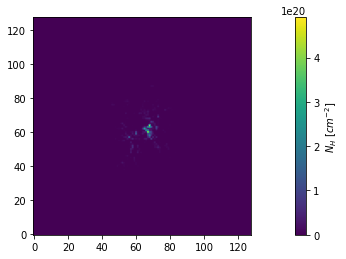

In [248]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds_x.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$N_{H}$ [$cm^{-2}$]')

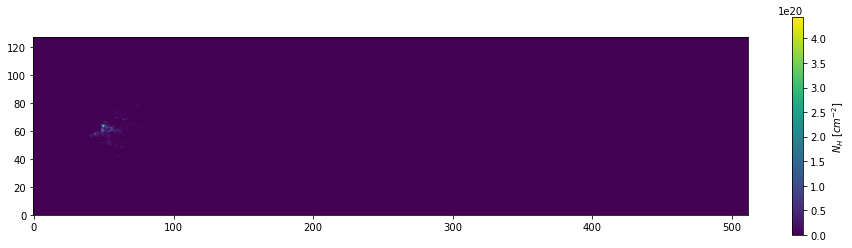

In [249]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds_y.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$N_{H}$ [$cm^{-2}$]')

<h2>Intermediate Gas</h2>

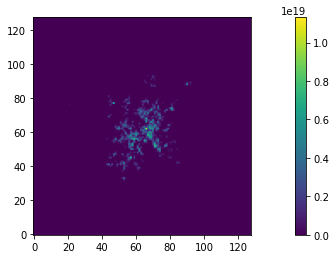

In [250]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_int_x.T, origin='lower', cmap='viridis')
cb = plt.colorbar()

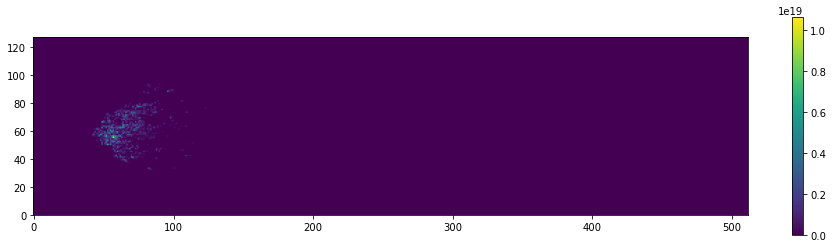

In [251]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_int_y.T, origin='lower', cmap='viridis')
cb = plt.colorbar()

<h2>Wind<h2>

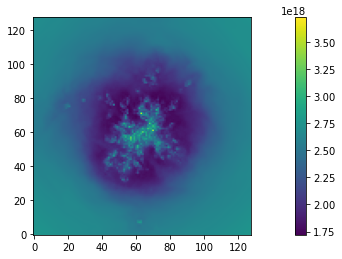

In [252]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_wind_x.T, origin='lower', cmap='viridis')
cb = plt.colorbar()

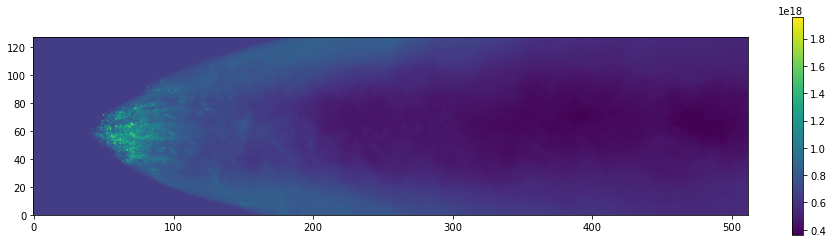

In [253]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_wind_y.T, origin='lower', cmap='viridis')
cb = plt.colorbar()

In [254]:
## Failed attempt

In [255]:
cmap = colors.ListedColormap(['blue', 'purple','red'])
bounds=[0,2e4,5e5,np.inf]
norm = colors.BoundaryNorm(bounds, cmap.N)

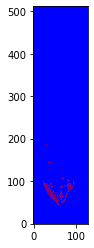

In [256]:
image = plt.imshow(T[:,int(ny/2),:], origin='lower', cmap=cmap)

<h2>Average Cloud Velocities</h2>

In [262]:
print(np.nanmean(Vx_clouds))

4.964166078563479e+25


In [263]:
print(np.nanmean(Vy_clouds))

2.6054893447824842e+23


In [264]:
print(np.nanmean(Vz_clouds))

-2.469848651583804e+24


In [265]:
V = np.sqrt(np.power(Vx_clouds, 2) + np.power(Vy_clouds, 2) + np.power(Vz_clouds, 2))

In [266]:
print(np.nanmean(V))

5.137097172462848e+25


<h2>Average Wind Velocities</h2>

In [268]:
print(np.nanmean(Vx_wind))

6.794425655801155e+26


In [272]:
print(np.nanmean(Vy_wind))

5.160769355435294e+23


In [271]:
print(np.nanmean(Vz_wind))

-3.635912976741783e+23


In [273]:
V = np.sqrt(np.power(Vx_wind, 2) + np.power(Vy_wind, 2) + np.power(Vz_wind, 2))

In [274]:
print(np.nanmean(V))

6.806169861337047e+26
